# Lista 1 - Juliana Carvalho de Souza

In [1]:
# -*- coding: utf-8 -*-
import cv2 as cv
import sys
import numpy as np
import matplotlib.pyplot as plt

# Rotação de uma imagem

## Rotação com o Open cv:

(796.0, 347.0)
rotating
rotating2


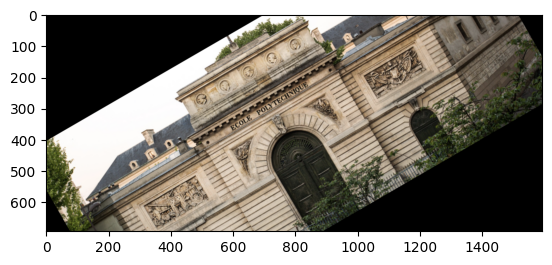

In [15]:

#%%  **********  você pode usar esta solução, mas não neste exercício!!! ****************
img = cv.imread('Ecole_polytechnique.png')[...,::-1]

# Obter o centro da imagem
height, width = img.shape[:2]
center = (width/2, height/2)
print(center)
# Definir a matriz de rotação
M = cv.getRotationMatrix2D(center, 30, 1)
print('rotating')
# Aplicar a rotação na imagem
rotated_img = cv.warpAffine(img, M, (width, height))
print('rotating2')

# Exibir a imagem
plt.imshow(rotated_img)


# cv.imshow('Display window', rotated_img)
# cv.waitKey(0)
# cv.destroyAllWindows()


## Minha rotação

In [16]:

#%%
angulo = 30
centro = (width/2, height/2)

def my_rotation(img, angulo, centro):
    
    # nessa primeira parte, vamos definir a transformação que leva a posicao dos pixels da imagem original
    # para a posicao dos pixels do imagem rotacionada.
    
    # a primeira matriz de translação muda a origem das coordenadas do canto da imagem para o centro da imagem
    matriz_translacao = np.matrix([[1, 0, -centro[0]], [0, 1, -centro[1]], [0, 0, 1]])
    # a matriz de rotacao aplica a rotacao em torno da origem
    matriz_rotacao = np.matrix([[np.cos(angulo), -np.sin(angulo), 0], [np.sin(angulo), np.cos(angulo), 0], [0, 0, 1]])
    # a composicao coloca todas as matrizes em uma só: aplica a translacao (muda a origem), rotaciona, volta para a origem anterior
    matriz_composicao = matriz_translacao.I * matriz_rotacao * matriz_translacao
    
    # criar imagem rotacionada em preto, com mesmas dimensões da original
    height, width = img.shape[:2]
    rotated_image = np.zeros((height,width,3), np.uint8)
    # o próximo passo é percorrer cada pixel da nova imagem e verificar qual é o pixel correspondente na imagem original
    m_comp_inv = matriz_composicao.I
    for linr in range(height):
        for colr in range(width):
            pos_rot = np.matrix([linr, colr, 1]).T
            pos_orig = m_comp_inv @ pos_rot
            lin = round(pos_orig[0,0]); col = round(pos_orig[1,0]);
            if (lin >=0 and lin < height) and (col >= 0 and col < width):
                #opa, é um pixel pertencente à imagem original...
                rotated_image[linr, colr] = img[lin, col]
                
    return rotated_image



rotating3


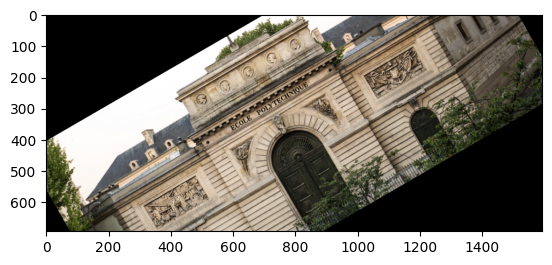

In [18]:

img = cv.imread('Ecole_polytechnique.png')[...,::-1]
height, width = img.shape[:2]
centro = (height/2, width/2)
angulo = np.pi/6
my_rotated_image =  my_rotation(img, angulo, centro)

print('rotating3')
plt.imshow(my_rotated_image)


# 2 - Transformação Projetiva de uma imagem

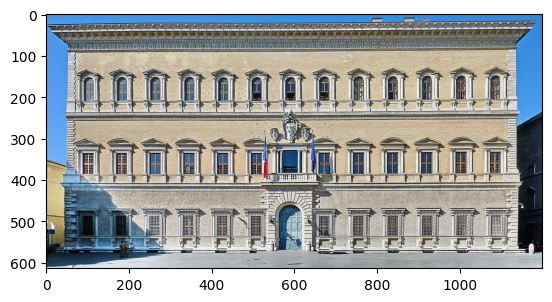

In [36]:

img2 = cv.imread('Palazzo_Farnese_Fassade.jpg')[...,::-1]
plt.imshow(img2)
height, width = img2.shape[:2]
centro = (height/2, width/2)
angulo = 30

In [6]:
def my_transform(img, T):
    matriz_composicao =  T 
    height, width = img.shape[:2]
    rotated_image = np.zeros((height,width,3), np.uint8)
    print(matriz_composicao)
    m_comp_inv = matriz_composicao.I

    for linr in range(height):
        for colr in range(width):
            pos_rot = np.matrix([linr, colr, 1]).T
            pos_orig = m_comp_inv @ pos_rot
            pos_orig = pos_orig / pos_orig[2,0]

            lin = round(pos_orig[0,0]); 
            col = round(pos_orig[1,0]);
            if (lin >=0 and lin < height) and (col >= 0 and col < width):
                rotated_image[linr, colr] = img[lin, col]
    return rotated_image


[[ 1.e+00  0.e+00  0.e+00]
 [ 0.e+00  1.e+00  0.e+00]
 [-5.e-04  0.e+00  1.e+00]]


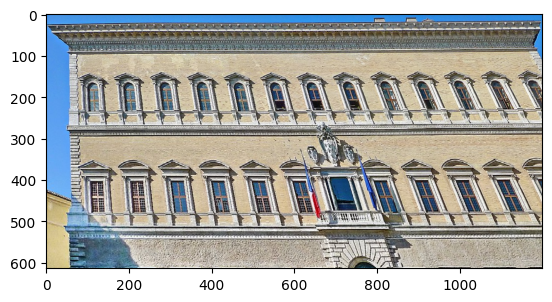

In [39]:
# ponto de fuga no eixo x (2000, 0)
# T = np.matrix([[1, 0, 0], [0, 1, 0], [x, 0, 1]])
# v = np.matrix([[2000], [0], [1]])
# v2 = M * v = [[2000], [0], [2000x + 1]] -> 2000x+1=0 (impróprio) -> x = -1/2000
T = np.matrix([[1, 0, 0], [0, 1, 0], [-1/2000, 0, 1]])

transformed_image = my_transform(img2, T)
plt.imshow(transformed_image)

# Questão 3 - Estimação da Transformação Projetiva

## 3.1 - Crie uma função

In [4]:
# Resposta
from pprint import pprint

def my_estimation(lst1, lst2):
    A = np.zeros((8, 9))
    for i in range(4):
        x, y = lst1[i]
        x_, y_ = lst2[i]
        A[2*i] = np.array([x, y, 1, 0, 0, 0, -x*x_, -y*x_, -x_])
        A[2*i + 1] = np.array([0, 0, 0, x, y, 1, -x*y_, -y*y_, -y_])
    _, _, V = np.linalg.svd(A)
    estimation_T = V[-1].reshape(3, 3)


    return estimation_T

# 3.2

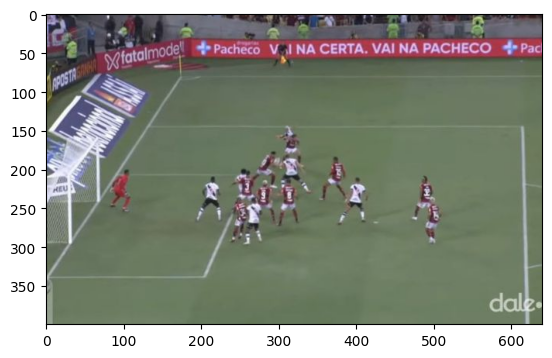

In [47]:
img3 = cv.imread('Vasco_Flamengo.jpg')[...,::-1]
plt.imshow(img3)


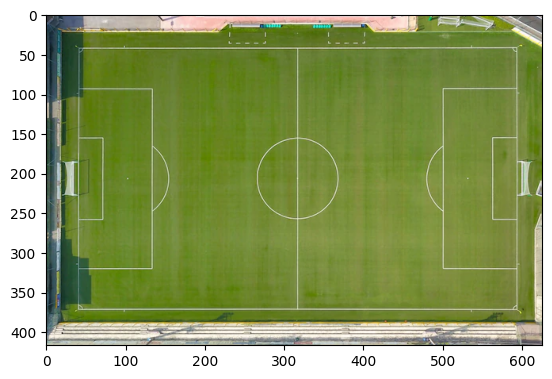

In [9]:

img4 = cv.imread('Campo_Futebol.webp')[...,::-1]
plt.imshow(img4)


[[-1.42395369e-02 -4.98416124e-05  9.89100177e-01]
 [-2.22153791e-03 -2.29959121e-03  1.46268421e-01]
 [-1.86514113e-05 -8.20472871e-07 -8.56730098e-03]]


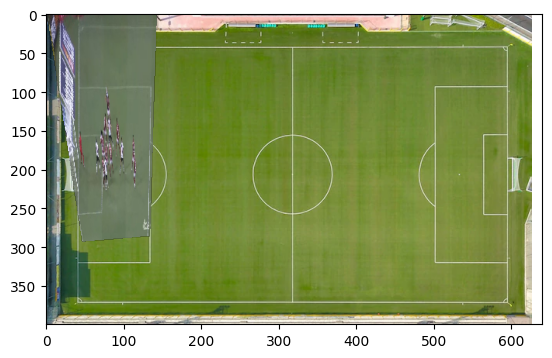

In [86]:
source_points = [[220, 619], [144, 132], [146, 615], [207, 92]]
destination_points = [[165, 134], [94, 42], [95, 135], [157, 42]]

transformation_matrix = my_estimation(source_points, destination_points)
transformation_matrix = np.matrix(transformation_matrix)
transformed_image = my_transform(img3, transformation_matrix)
alpha_channel = np.zeros_like(transformed_image[..., 0])  # channel dimensions
alpha_channel[np.sum(transformed_image, axis=-1) > 0] = 255  # Transparent areas

final_image = np.dstack((transformed_image, alpha_channel))

plt.imshow(img4)
plt.imshow(final_image)
plt.show()



#  Questão 4

# 4.1

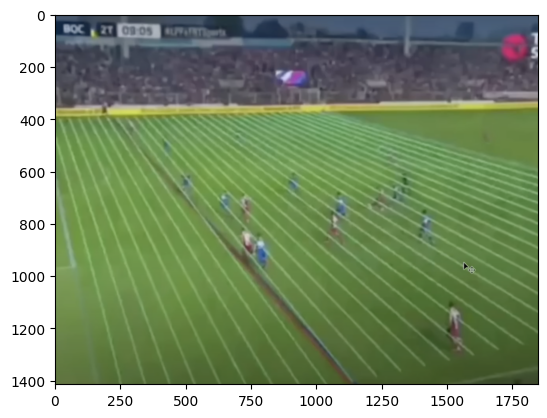

In [2]:
img_boca = cv.imread('Union_Boca(Linhas).png')[...,::-1]
plt.imshow(img_boca)

[[-3.19324902e-03  1.70192725e-03  5.98752926e-02]
 [-1.98183604e-04 -2.22718038e-04 -9.98175836e-01]
 [-2.45650589e-06  2.15510263e-06 -6.83868233e-03]]


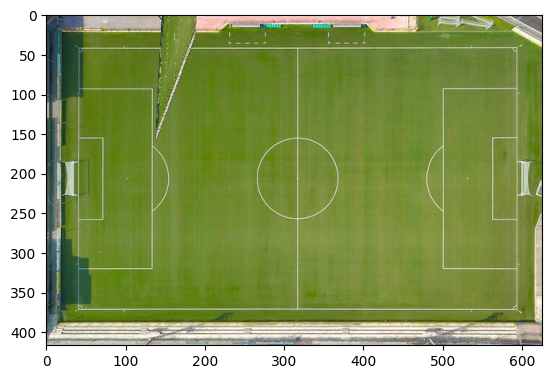

In [13]:
boca_source = [[963, 69], [683, 15],  [1683, 1369], [1414, 1848]]
destination_points = [[ 320, 133], [247, 134], [372, 204], [207, 267]]

boca_transformation_matrix = my_estimation(boca_source, destination_points)
boca_transformation_matrix = np.matrix(boca_transformation_matrix)
boca_transformed_image = my_transform(img4, boca_transformation_matrix)
boca_alpha_channel = np.zeros_like(boca_transformed_image[..., 0])  # channel dimensions
boca_alpha_channel[np.sum(boca_transformed_image, axis=-1) > 0] = 255  # Transparent areas

boca_final_image = np.dstack((boca_transformed_image, boca_alpha_channel))

plt.imshow(img4)
plt.imshow(boca_final_image)
plt.show()

